## Dwi Humaira Hafizah Faturahma
## 202131098
## B Mechine Learning

# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas untuk memproses membaca data
Numpy untuk membaca angka
Matplotlib.pyplot untuk menvisualisasi data

# IMPORT DATA

In [2]:
df = pd.read_csv('tennis.csv',';')
df

C:\Users\dwihu\AppData\Local\Temp\ipykernel_9680\3485898401.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('tennis.csv',';')


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


untuk membaca data dari file CSV dengan nama "tennis.csv" yang dipisahkan oleh tanda titik koma (";").

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


mendapatkan informasi ringkas tentang DataFrame yang Anda baca dari file CSV.

In [4]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


 mendapatkan statistik deskriptif tentang kolom-kolom numerik dalam DataFrame

# MENGUBAH OBJECT MENJADI NUMERIK

In [5]:
from sklearn.preprocessing import LabelEncoder

for col in ['outlook', 'temp', 'humidity', 'play' ]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df['outlook'].unique(), df['temp'].unique(), df['humidity'].unique(), df['play'].unique())

[2 0 1] [1 2 0] [0 1] [0 1]


memeriksa hasil transformasi dan memahami representasi numerik dari data kategori dalam DataFrame.

In [6]:
df

,outlook,temp,humidity,windy,play
0,2,1,0,False,0
1,2,1,0,True,0
2,0,1,0,False,1
3,1,2,0,False,1
4,1,0,1,False,1
5,1,0,1,True,0
6,0,0,1,True,1
7,2,2,0,False,0
8,2,0,1,False,1
9,1,2,1,False,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int32
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   windy     14 non-null     bool 
 4   play      14 non-null     int32
dtypes: bool(1), int32(4)
memory usage: 366.0 bytes


# DATA X DAN Y

In [8]:
x = np.asarray(df.drop(['play'], axis=1))
y = np.asarray(df['play'])

In [9]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [10]:
df.describe()

,outlook,temp,humidity,play
count,14.000000,14.000000,14.000000,14.000000
mean,1.071429,1.142857,0.500000,0.642857
std,0.828742,0.864438,0.518875,0.497245
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,1.000000
75%,2.000000,2.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000


In [11]:
print (x_train)

[[1 2 0 True]
 [1 2 1 False]
 [2 1 0 True]
 [2 2 0 False]
 [2 2 1 True]
 [1 2 0 False]
 [2 1 0 False]
 [1 0 1 True]
 [0 1 1 False]]


In [12]:
print (x_test)

[[2 0 1 False]
 [0 0 1 True]
 [1 0 1 False]
 [0 2 0 True]
 [0 1 0 False]]


In [13]:
print (y_test)

[1 1 1 1 1]


In [14]:
# standar scaler untuk mengatasi standar deviasi yang terlalu jauh
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# PEMODELAN
Decision Tree

In [15]:
# model decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7) #max dept untuk kedalaman tree tapi mengurangi akurasi
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

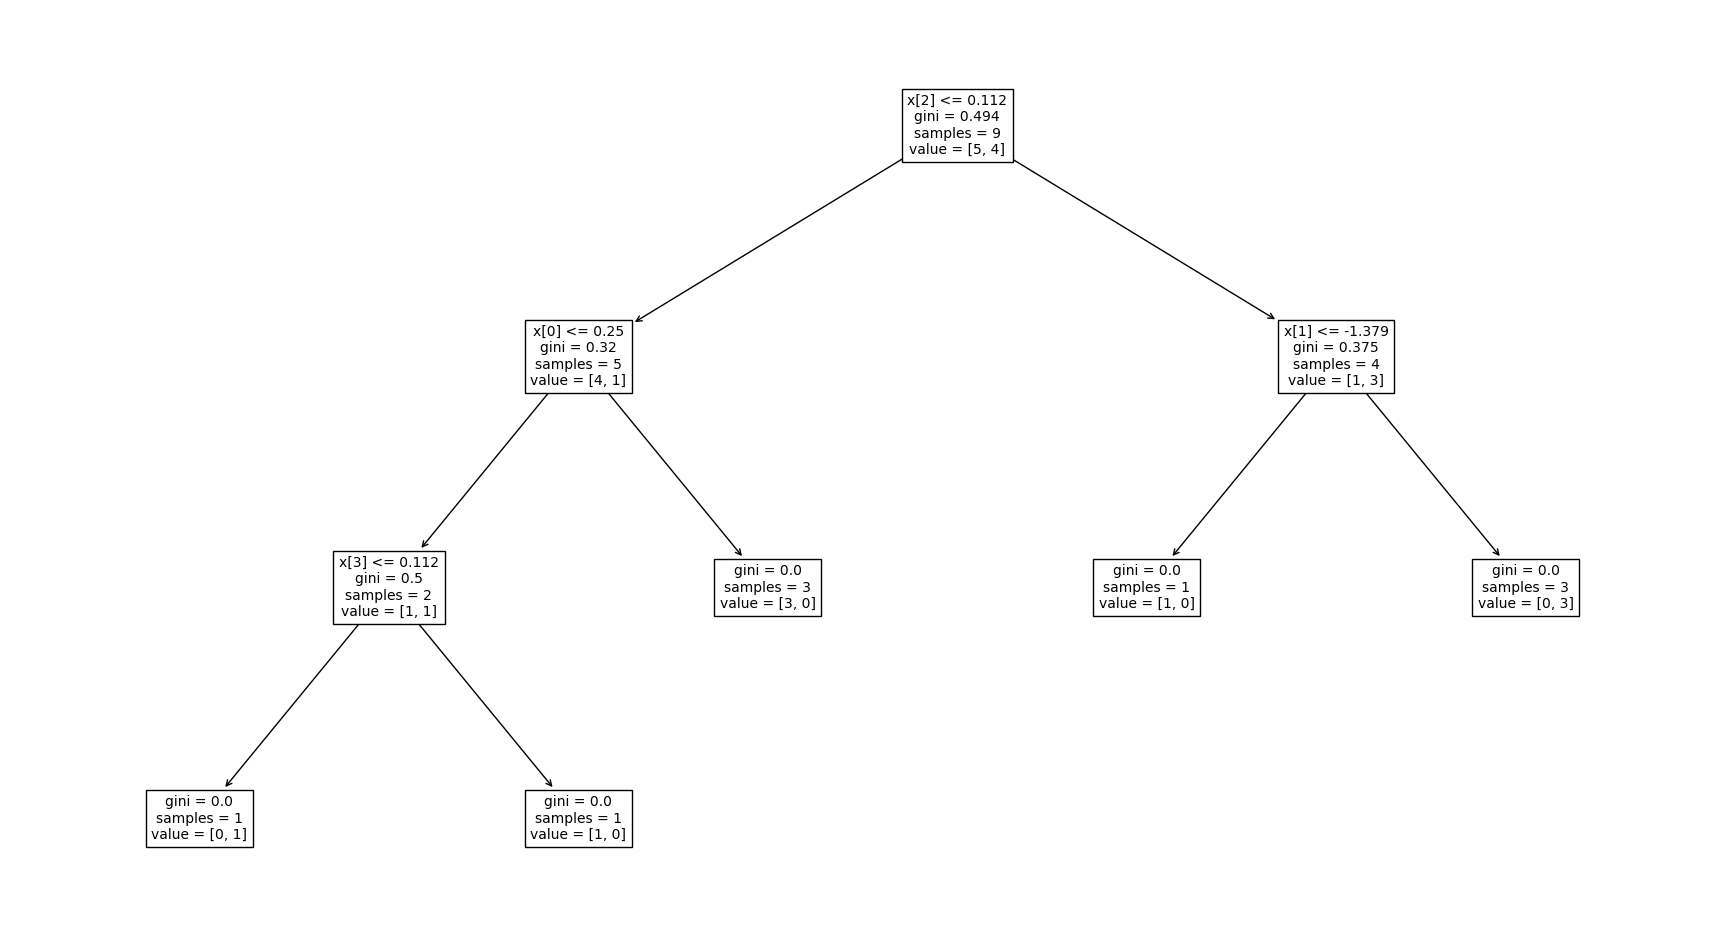

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize = (22, 12))
tree.plot_tree(model, fontsize=10)
plt.show()

In [17]:
predict = model.predict(x_test)

In [18]:
x_new = np.array([[0,2,1,0]])
predict = model.predict(x_new)
print(predict)

[1]
